<a href="https://colab.research.google.com/github/andradec/ReconhecimentoFacial/blob/main/ReconhecimentoFacial_IAGenerativa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Bibliotecas gerais para manipulação de imagens e geração de graficos
import os
import cv2 as cv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

#Bibliotecas especificas do modulo Keras utilizadas no desenvolvimento do projeto
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from sklearn.metrics import mean_absolute_error
from keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D, Dropout, BatchNormalization, Dense

#Biblioteca utilizada para divisão da base de teste
from sklearn.model_selection import train_test_split



In [3]:
df = pd.read_csv("/content/drive/My Drive/archive (4)/faces.csv")
df_test = pd.read_csv("/content/drive/My Drive/MidJourney/anotacao/annotations.csv")

In [4]:
df.head()

,image_name,width,height,x0,y0,x1,y1
0,00001722.jpg,1333,2000,490,320,687,664
1,00001044.jpg,2000,1333,791,119,1200,436
2,00001050.jpg,667,1000,304,155,407,331
3,00001736.jpg,626,417,147,14,519,303
4,00003121.jpg,626,418,462,60,599,166


In [5]:
df_test.head()

,image_name,width,height,x0,y0,x1,y1
0,Jsan_Create_a_art_print_inspired_on_salvador_d...,1024,1024,233.62,59.32,806.14,802.51
1,Jsan_Create_a_art_print_inspired_on_salvador_d...,1024,1024,269.93,134.37,787.99,691.15
2,Jsan_Create_a_art_print_with_reference_of_most...,1024,1024,177.94,99.27,775.88,1022.80
3,Jsan_Create_a_art_print_with_reference_of_most...,1024,1024,271.15,10.91,841.24,712.94
4,Jsan_Create_a_art_print_with_reference_of_most...,1024,1024,407.92,16.96,1024.00,766.20


In [6]:
data = {}
for i in df["image_name"]:
  if i not in data:
    data[i] = []
for idx, img_name in enumerate(df["image_name"]):
      width = df["width"][idx]
      height = df["height"][idx]
      x1 = df["x0"][idx]
      y1 = df["y0"][idx]
      x2 = df["x1"][idx]
      y2 = df["y1"][idx]

      new_x1 = int((x1/width)*128)
      new_y1 = int((y1/height)*128)
      new_x2 = int((x2/width)*128)
      new_y2 = int((y2/height)*128)

      data[img_name].append(new_x1)
      data[img_name].append(new_y1)
      data[img_name].append(new_x2)
      data[img_name].append(new_y2)

In [7]:
data_test = {}
for i in df_test["image_name"]:
  if i not in data_test:
    data_test[i] = []
for idx, img_name in enumerate(df_test["image_name"]):
      width = df_test["width"][idx]
      height = df_test["height"][idx]
      x1 = df_test["x0"][idx]
      y1 = df_test["y0"][idx]
      x2 = df_test["x1"][idx]
      y2 = df_test["y1"][idx]

      new_x1 = int((x1/width)*128)
      new_y1 = int((y1/height)*128)
      new_x2 = int((x2/width)*128)
      new_y2 = int((y2/height)*128)

      data_test[img_name].append(new_x1)
      data_test[img_name].append(new_y1)
      data_test[img_name].append(new_x2)
      data_test[img_name].append(new_y2)

In [ ]:
print(df)

In [ ]:
print(df_test)

In [10]:
img_dir = os.listdir('/content/drive/My Drive/archive (4)/images')
images = []
for img_name in data.keys():
    for itr in img_dir:
      if img_name==itr:
        img_arr = cv.imread(os.path.join('/content/drive/My Drive/archive (4)/images', img_name), cv.IMREAD_GRAYSCALE)
        resized_img = cv.resize(img_arr, (128, 128))
        images.append(resized_img)

In [11]:
img_dir_test = os.listdir('/content/drive/My Drive/MidJourney')
images_test = []
for img_name in data_test.keys():
    for itr in img_dir_test:
      if img_name==itr:
        img_arr_test = cv.imread(os.path.join('/content/drive/My Drive/MidJourney', img_name), cv.IMREAD_GRAYSCALE)
        resized_img_test = cv.resize(img_arr_test, (128, 128))
        images_test.append(resized_img_test)

In [12]:
bbox = []
for boxes in data.keys():
  bbox.append(data[boxes])

In [13]:
bbox_test = []
for boxes in data_test.keys():
  bbox_test.append(data_test[boxes])

In [14]:
images = np.array(images)

In [15]:
images_test = np.array(images_test)

In [16]:
images = np.expand_dims(images, axis=3)

In [17]:
images_test = np.expand_dims(images_test, axis=3)

In [18]:
print(f"shape of images {images.shape}")

shape of images (2204, 128, 128, 1)


In [19]:
print(f"shape of images test {images_test.shape}")

shape of images test (50, 128, 128, 1)


In [20]:
max_bbox = 0
for i in range(len(bbox)):
  max_bbox = max(max_bbox, len(bbox[i]))
print(f"the max faces in the image are {int(max_bbox/4)}")

the max faces in the image are 12


In [21]:
max_bbox_test = 0
for i in range(len(bbox_test)):
  max_bbox_test = max(max_bbox_test, len(bbox_test[i]))
print(f"the max faces in the image are {int(max_bbox_test/4)}")

the max faces in the image are 2


In [22]:
for i in range(len(bbox)):
  if int(max_bbox) - len(bbox[i])!=0:
    for j in range(int(max_bbox) - len(bbox[i])):
      bbox[i].append(0)

In [23]:
for i in range(len(bbox_test)):
  if int(max_bbox_test) - len(bbox_test[i])!=0:
    for j in range(int(max_bbox_test) - len(bbox_test[i])):
      bbox_test[i].append(0)

In [24]:
bbox = np.array(bbox)

In [25]:
bbox_test = np.array(bbox_test)

In [26]:
print(f"shape of bbox {bbox.shape}")

shape of bbox (2204, 48)


In [27]:
print(f"shape of bbox test {bbox_test.shape}")

shape of bbox test (50, 8)


In [28]:
images = images/255
bbox = bbox/128

In [29]:
images_test = images_test/255
bbox_test = bbox_test/128

In [ ]:
plt.figure(figsize=(15,10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.imshow(images[i], cmap='gray')
  plt.axis("off")

In [ ]:
plt.figure(figsize=(15,10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.imshow(images_test[i], cmap='gray')
  plt.axis("off")

In [32]:
x_train, x_test, y_train, y_test = train_test_split(images, bbox, test_size=0.1, random_state=22)
x_train1, x_test1, y_train1, y_test1 =  train_test_split(images, bbox, test_size=0.0227, random_state=22)

In [33]:
conjunto_val = 50
indice_inicial = 0
conjunto_imagens = y_test1[indice_inicial:indice_inicial + conjunto_val]


In [34]:
model1 = Sequential()

model1.add(Conv2D(32, (3,3), input_shape=(128,128,1), padding="same", activation="leaky_relu"))
model1.add(MaxPool2D(2,2))
model1.add(Conv2D(64, (3,3), padding="same", activation="leaky_relu"))
model1.add(MaxPool2D(2,2))
model1.add(Conv2D(128, (3,3), padding="same", activation="leaky_relu"))
model1.add(MaxPool2D(2,2))
model1.add(Conv2D(256, (3,3), padding="same", activation="leaky_relu"))
model1.add(MaxPool2D(2,2))
model1.add(GlobalAveragePooling2D())
model1.add(Dense(256, activation="leaky_relu"))
model1.add(Dense(64, activation="leaky_relu"))
model1.add(Dense(48, activation="sigmoid"))

In [ ]:
model1.summary()

In [36]:
class CustomCallbacks(keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    prediction = model1.predict(x_test[0].reshape(1, 128, 128, 1))
    fig, ax = plt.subplots(1)
    ax.imshow(x_test[0])
    x1 = int(prediction[0][0]*128)
    y1 = int(prediction[0][1]*128)
    x2 = int(prediction[0][2]*128)
    y2 = int(prediction[0][3]*128)
    rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1,edgecolor='r', facecolor="none")
    ax.add_patch(rect)
    plt.show()

In [37]:
model1.compile(optimizer = "adam", loss="binary_crossentropy", metrics=['accuracy', keras.metrics.Precision(name='precision_metric')])

In [ ]:
history1 = model1.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, callbacks=[CustomCallbacks()])

In [ ]:
plt.plot(history1.history["val_loss"])
plt.plot(history1.history["loss"])
plt.legend(["valid", "train"])
plt.show()

In [ ]:
plt.plot(history1.history["val_accuracy"])
plt.plot(history1.history["accuracy"])
plt.legend(["valid", "train"])
plt.show()

In [41]:
y_pred = model1.predict(x_test)
x_test.shape

7/7 [==============================] - 0s 7ms/step


(221, 128, 128, 1)

In [42]:
y_pred1 = model1.predict(images_test)
images_test.shape

2/2 [==============================] - 0s 172ms/step


(50, 128, 128, 1)

In [43]:
print(f"mean absolute error is {mean_absolute_error(y_pred, y_test)}")
conjunto_imagens.shape

mean absolute error is 0.024923669791640818


(50, 48)

In [44]:
print(f"mean absolute error is {mean_absolute_error(y_pred1, conjunto_imagens)}")

mean absolute error is 0.033243012470697754


In [45]:
model2 = Sequential()

model2.add(Conv2D(32, (3,3), input_shape=(128,128,1), activation="relu"))
model2.add(Dropout(0.1))
model2.add(MaxPool2D(2,2))
model2.add(BatchNormalization())
model2.add(Conv2D(64, (3,3), activation="relu"))
model2.add(Dropout(0.1))
model2.add(MaxPool2D(2,2))
model2.add(BatchNormalization())
model2.add(Conv2D(128, (3,3), activation="relu"))
model2.add(Dropout(0.2))
model2.add(MaxPool2D(2,2))
model2.add(BatchNormalization())
model2.add(Conv2D(256, (3,3), activation="relu"))
model2.add(Dropout(0.3))
model2.add(MaxPool2D(2,2))
model2.add(BatchNormalization())
model2.add(GlobalAveragePooling2D())
model2.add(Dense(256, activation="leaky_relu"))
model2.add(Dense(48, activation="sigmoid"))

In [ ]:
model2.summary()

In [47]:
class CustomCallbacks2(keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    prediction = model2.predict(x_test[0].reshape(1, 128, 128, 1))
    fig, ax = plt.subplots(1)
    ax.imshow(x_test[0])
    x1 = int(prediction[0][0]*128)
    y1 = int(prediction[0][1]*128)
    x2 = int(prediction[0][2]*128)
    y2 = int(prediction[0][3]*128)
    rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1,edgecolor='r', facecolor="none")
    ax.add_patch(rect)
    plt.show()

In [48]:
model2.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy', keras.metrics.Precision(name='precision_metric')])


In [ ]:
history2 = model2.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=8, epochs=100, callbacks=[CustomCallbacks2()])

In [ ]:
plt.plot(history2.history["val_loss"])
plt.plot(history2.history["loss"])
plt.legend(["valid", "train"])
plt.show()

In [ ]:
plt.plot(history2.history["accuracy"])
plt.plot(history2.history["val_accuracy"])
plt.legend(["valid", "train"])
plt.show()

In [ ]:
plt.plot(history2.history["precision_metric"])
plt.plot(history2.history["val_precision_metric"])
plt.legend(["valid", "train"])
plt.show()

In [ ]:
plt.plot(history2.history["val_loss"])
plt.plot(history2.history["loss"])
plt.legend(["valid", "train"])
plt.show()

In [54]:
y_pred2 = model2.predict(images_test)

2/2 [==============================] - 0s 138ms/step


In [55]:
print(f"mean absolute error is {mean_absolute_error(y_pred2, conjunto_imagens)}")

mean absolute error is 0.029422604494255877


In [56]:
resultado2 = model2.evaluate(images_test, conjunto_imagens)
print("Perda (Loss):", resultado2[0])
print("Acurácia:", resultado2[1])

2/2 [==============================] - 0s 12ms/step - loss: 0.2646 - accuracy: 0.8400 - precision_metric: 1.0000
Perda (Loss): 0.2645699977874756
Acurácia: 0.8399999737739563


In [57]:
resultado1 = model1.evaluate(images_test, conjunto_imagens)
print("Perda (Loss):", resultado1[0])
print("Acurácia:", resultado1[1])

2/2 [==============================] - 0s 10ms/step - loss: 0.3026 - accuracy: 0.8000 - precision_metric: 0.9589
Perda (Loss): 0.30261996388435364
Acurácia: 0.800000011920929


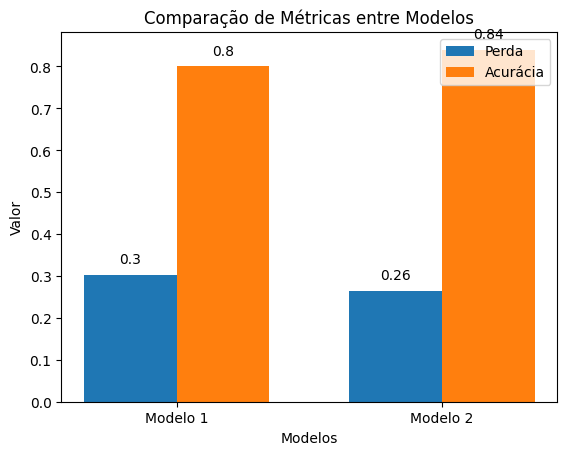

In [58]:
modelos = ['Modelo 1', 'Modelo 2']
perda = [resultado1[0], resultado2[0]]
acuracia = [resultado1[1], resultado2[1]]
largura_barra = 0.35
indices = range(len(modelos))
fig, ax = plt.subplots()
barra_perda = ax.bar(indices, perda, largura_barra, label='Perda')
barra_acuracia = ax.bar([p + largura_barra for p in indices], acuracia, largura_barra, label='Acurácia')
ax.set_xlabel('Modelos')
ax.set_ylabel('Valor')
ax.set_title('Comparação de Métricas entre Modelos')
ax.set_xticks([p + largura_barra / 2 for p in indices])
ax.set_xticklabels(modelos)
ax.legend()
for i in range(len(perda)):
    ax.text(i, perda[i] + 0.02, round(perda[i], 2), ha='center', va='bottom')
    ax.text(i + largura_barra, acuracia[i] + 0.02, round(acuracia[i], 2), ha='center', va='bottom')
plt.show()


In [59]:
def model1_predictions(img_number):
  model1_prediction = model1.predict(images_test[img_number].reshape(1, 128, 128, 1))
  model1_prediction = model1_prediction[0]
  img = images_test[img_number]

  count = 0
  bbox1 = []
  for i in model1_prediction:
    bbox1.append(i)
    count+=1
    if count==4:
      count = 0
      plt.subplot(1,2,1)
      plt.imshow(img)
      x1 = int(bbox1[0]*128)
      y1 = int(bbox1[1]*128)
      x2 = int(bbox1[2]*128)
      y2 = int(bbox1[3]*128)
      plt.gca().add_patch(patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1,edgecolor='r', facecolor="none"))
      bbox1 = []
  plt.show()

1/1 [==============================] - 0s 21ms/step


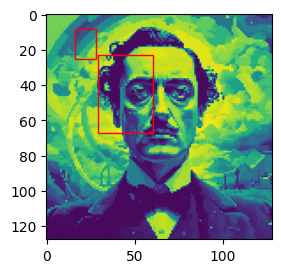

In [60]:
model1_predictions(0)

In [61]:
def model2_predictions(img_number):
  model2_prediction = model2.predict(images_test[img_number].reshape(1, 128, 128, 1))
  model2_prediction = model2_prediction[0]
  img = images_test[img_number]

  count = 0
  bbox1 = []
  for i in model2_prediction:
    bbox1.append(i)
    count+=1
    if count==4:
      count = 0
      plt.subplot(1,2,1)
      plt.imshow(img)
      x1 = int(bbox1[0]*128)
      y1 = int(bbox1[1]*128)
      x2 = int(bbox1[2]*128)
      y2 = int(bbox1[3]*128)
      plt.gca().add_patch(patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1,edgecolor='r', facecolor="none"))
      bbox1 = []
  plt.show()

1/1 [==============================] - 0s 18ms/step


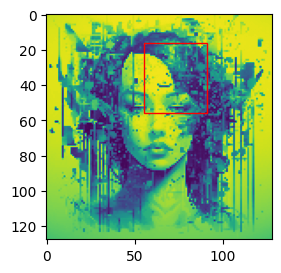

In [62]:
model2_predictions(5)